In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('Fraud.csv')

In [131]:
# Delete irrelevant columns like nameOrig and nameDest
del dataset["nameOrig"]
del dataset["nameDest"]

In [132]:
# Parameters to consider for the model
X = dataset.iloc[:, [1,2,3,4,5,6]].values #excluding step
y = dataset.iloc[:, -2].values

In [133]:
# Application of One Hot Encoding for transaction type
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [('encoder',OneHotEncoder(),[0])]  , remainder = 'passthrough' )
X = np.array(ct.fit_transform(X))

In [134]:
# Splitting into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [135]:
# Feature scaling for the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [136]:
# Classifier Models

#Decision Tree Classifer - best at 99.9748%
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Random Forest Classifier - second best at 99.9685%
#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
#classifier.fit(X_train, y_train)

#KNN - third best at 99.9583%
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#classifier.fit(X_train, y_train)

# Linear, log, svm and knn have the same performance at 99.9160%

# Linear
#from sklearn.linear_model import LinearRegression
#regressor = LinearRegression()
#regressor.fit(X_train, y_train)

#Log
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0, max_iter = len(y_train) )
#classifier.fit(X_train, y_train)

#SVM 
#from sklearn.svm import SVC
#classifier = SVC(kernel = 'linear', random_state = 0)
#classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#Kernal SVM 
#from sklearn.svm import SVC
#classifier = SVC(kernel = 'rbf', random_state = 0)
#classifier.fit(X_train, y_train)

#Naive Bayes - worst performance at 56.5791%
#from sklearn.naive_bayes import GaussianNB
#classifier = GaussianNB()
#classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [137]:
# Confusion Matrix and performance
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1270731     152]
 [    169    1472]]


0.9997477454256265

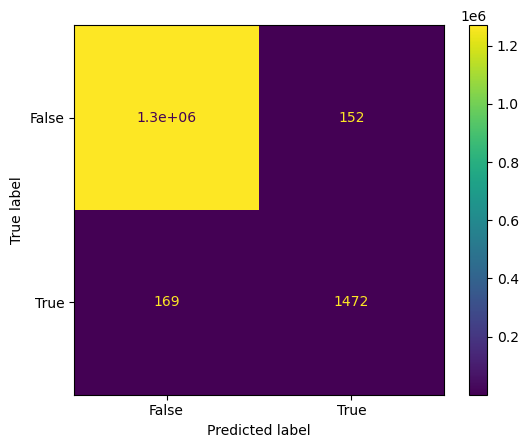

In [138]:
import matplotlib.pyplot as plt
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [139]:
# Conclusion and future predictions

In [140]:
#1. Describe your fraud detection model in elaboration.
# I tried a variety of models for classification of the training data like multiple linear regression,
# Logarithmic regression, SVM, Kernel, SVM, Naive Bayes, Decision Tree and Random Forest.
# The decision tree classifier was my best performing method.
# The decision tree classification works great when some data trends like the amount in the old account being 0 
# after a transaction occur. 
# This is because it makes a hierarchical decision tree based on division of the data into smaller subsets where each 
# subset might have some parameter / parameter change in common. 

#2. How did you select variables to be included in the model?
# I basically used all the variables since they had some important information about the transaction except the step / time 
# when the transaction took place.

#3. Demonstrate the performance of the model by using best set of tools.
# My best model performed at 99.97% and was the Decision Tree Classifier. I used the confusion matrix to get these accuracy values.
# My worst model was the Naive Bayes Classifier which performed at 56.58%. This is to be expected since the naive bayes is 
# worse at classifying datasets which clearly have some correlation between the different variables.

#4. What are the key factors that predict fraudulent customer? Do these factors make sense? If yes, How? If not, How not?
# After some transactions, the new balance in the original account is 0. This could mean that there is a third party involved.

#5. What kind of prevention should be adopted while company update its infrastructure?
# The company should verify with the customer whenever they are trying to make a transaction such as transferring all their 
# funds to a different account.

#6. Assuming these actions have been implemented, how would you determine if they work?
# The Decision tree classifier could be used again to determine whether the same number of fraudulent transactions are taking place . 
